In [32]:
import pandas as pd
# import modin.pandas as mpd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# import geopandas as gpd

# from scipy import ndimage

# import contextily as cx

# import matplotlib.pylab as pylab
# import matplotlib

from shapely.geometry import Point
from shapely.geometry import LineString

from utils.maputils import generate_3857_df, generate_lines,\
                            generate_buffers,generate_base_length\

from utils.routineutils import generate_routine, generate_adjusted_geometry,\
                                generate_belonging_relations, \
                                generate_cum_length, generate_correct_geometry,\
                                generate_station_status\
                                    ,generate_interpolation
            
from utils.timeutils import time_transfer

In [2]:
# res = pd.read_pickle('./data/output/gps_6.pkl')
# res.columns
# len(res)
# routine = generate_routine(res, 7, 1)

# mapdf = pd.read_excel('./data/map/map_down.xlsx')
# mapdf = generate_3857_df(mapdf)
# mapline = generate_lines(mapdf)
# mapline = generate_buffers(mapline)
# mapline = generate_base_length(mapline)

# import geopandas as gpd
# plt_mapline = gpd.GeoDataFrame(mapline)
# plt_routine = gpd.GeoDataFrame(routine)
# fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
# plt_mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
# plt_mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
# plt_routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

# plt_mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
# plt_mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
# adjusted_routine = gpd.GeoDataFrame({'geometry':plt_routine['adjusted_geometry']})
# adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# ax[0].set_xlim((7800+1.349e7, 8700+1.349e7))
# ax[0].set_ylim((3.679e6, 3.682e6))
# ax[1].set_xlim((7800+1.349e7, 8700+1.349e7))
# ax[1].set_ylim((3.679e6, 3.682e6))


In [33]:
gps = pd.read_csv('./data/gps/gps_0906.csv')
gps = time_transfer(gps)
gps = generate_3857_df(gps)

generate_3857_df:   0%|          | 0/86559 [00:00<?, ?it/s]

d:\programs\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [17]:
# mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = generate_3857_df(mapdf)

mapline = generate_lines(mapdf)
mapline = generate_buffers(mapline)
mapline = generate_base_length(mapline)

generate_3857_df:   0%|          | 0/85 [00:00<?, ?it/s]

d:\programs\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [34]:
routine = generate_routine(gps, 20, 0)

In [35]:
og_routine = generate_belonging_relations(routine, mapline)
routine = og_routine.copy(deep=True)
routine = generate_adjusted_geometry(routine)
routine = generate_cum_length(routine, mapline)
routine = generate_correct_geometry(routine)

In [36]:
len(routine), len(routine.loc[routine['diff_distance']<0])

(230, 0)

In [37]:
routine = generate_interpolation(routine, mapline)

230


d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged n

391
560


d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:995: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result = super().apply_broadcast(target.T)
d:\programs\envs\ox\lib\site-packages\pandas\core\apply.py:853: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ares = np.asarray(res).ndim
d:\programs\envs\ox\li

577
601
602


In [38]:
routine.columns

Index(['vid', 'time', 'lon', 'lat', 'direction', 'nidx', 'deadheading',
       'month', 'day', 'geometry', 'belong_rect_buffer', 'belong_circ_buffer',
       'belong_line', 'belong_line_idx', 'selected_line', 'selected_line_idx',
       'adjusted_geometry', 'base_length', 'end_length', 'start_is_station',
       'end_is_station', 'start', 'end', 'cur_length', 'cum_length',
       'diff_distance', 'diff_time', 'velocity'],
      dtype='object')

In [39]:
routine.selected_line_idx

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
597    83.0
598    83.0
599    83.0
600    83.0
601    83.0
Name: selected_line_idx, Length: 602, dtype: object

In [40]:

routine = generate_station_status(routine)
routine

,vid,time,lon,lat,direction,nidx,deadheading,month,day,geometry,...,start_is_station,end_is_station,start,end,cur_length,cum_length,diff_distance,diff_time,velocity,station_status
0,9,2021-09-06 04:19:04,121.25051,31.407463,0,20,0,9,6,POINT (13497545.031624725 3685779.8002971387),...,True,False,菊园车站,交叉口0,11.318892,11.318892,NaN,NaN,0.0,菊园车站
1,9,2021-09-06 04:19:14,121.25053,31.40746,0,20,0,9,6,POINT (13497547.258014541 3685779.409008156),...,True,False,菊园车站,交叉口0,11.46293,11.46293,0.144038,10.0,0.014404,菊园车站
2,9,2021-09-06 04:19:34,121.250534,31.40745,0,20,0,9,6,POINT (13497547.703292506 3685778.104711633),...,True,False,菊园车站,交叉口0,12.710338,12.710338,1.247408,20.0,0.06237,菊园车站
3,9,2021-09-06 04:19:44,121.250534,31.407446,0,20,0,9,6,POINT (13497547.703292506 3685777.582993063),...,True,False,菊园车站,交叉口0,13.228891,13.228891,0.518553,10.0,0.051855,菊园车站
4,9,2021-09-06 04:19:54,121.25052,31.407442,0,20,0,9,6,POINT (13497546.14481963 3685777.0612745155),...,True,False,菊园车站,交叉口0,13.918858,13.918858,0.689967,10.0,0.068997,菊园车站
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,9,2021-09-06 05:24:11,121.25006,31.33241,0,20,0,9,6,POINT (13497494.937853867 3675994.5726340115),...,False,True,交叉口55,公交嘉定新城站,244.300392,17352.40283,42.582407,5.0,8.516481,0
598,9,2021-09-06 05:24:16,121.25006,31.33241,0,20,0,9,6,POINT (13497494.937853867 3675994.5726340115),...,False,True,交叉口55,公交嘉定新城站,286.882799,17394.985237,42.582407,5.0,8.516481,0
599,9,2021-09-06 05:24:19,121.24985,31.332783,0,20,0,9,6,POINT (13497471.560760802 3676043.1841563955),...,False,True,交叉口55,公交嘉定新城站,313.849391,17421.951828,26.966591,3.0,10.786637,0
600,9,2021-09-06 05:24:21,121.24985,31.332783,0,20,0,9,6,POINT (13497471.560760802 3676043.1841563955),...,False,True,交叉口55,公交嘉定新城站,340.815982,17448.91842,26.966591,2.0,10.786637,0


In [41]:
for i, row in routine.iterrows():
    print(row['time'],row['station_status'],row['start'],row['end'],row['cur_length'],row['selected_line'].length - row['cur_length'],row['velocity'])

2021-09-06 04:19:04 菊园车站 菊园车站 交叉口0 11.318892334654288 362.55125624984447 0.0
2021-09-06 04:19:14 菊园车站 菊园车站 交叉口0 11.462930017866904 362.40721856663185 0.014403768321261622
2021-09-06 04:19:34 菊园车站 菊园车站 交叉口0 12.710337730726701 361.15981085377206 0.06237038564298984
2021-09-06 04:19:44 菊园车站 菊园车站 交叉口0 13.228890960646305 360.6412576238524 0.051855322991960405
2021-09-06 04:19:54 菊园车站 菊园车站 交叉口0 13.918858274703288 359.95129030979547 0.06899673140569824
2021-09-06 04:20:19 菊园车站 菊园车站 交叉口0 13.966572679657325 359.90357590484143 0.00195751404939639
2021-09-06 04:20:43 菊园车站 菊园车站 交叉口0 14.014287084611361 359.8558614998874 0.00195751404939639
2021-09-06 04:21:08 菊园车站 菊园车站 交叉口0 14.062001489565398 359.80814709493336 0.00195751404939639
2021-09-06 04:21:32 菊园车站 菊园车站 交叉口0 14.109715894519436 359.7604326899793 0.00195751404939639
2021-09-06 04:21:57 菊园车站 菊园车站 交叉口0 14.157430299473473 359.7127182850253 0.00195751404939639
2021-09-06 04:22:21 菊园车站 菊园车站 交叉口0 14.20514470442751 359.66500388007125 0.00195751404939

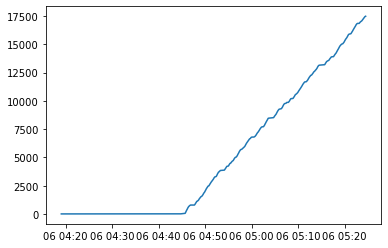

In [42]:
plt.plot(routine['time'], routine['cum_length'])

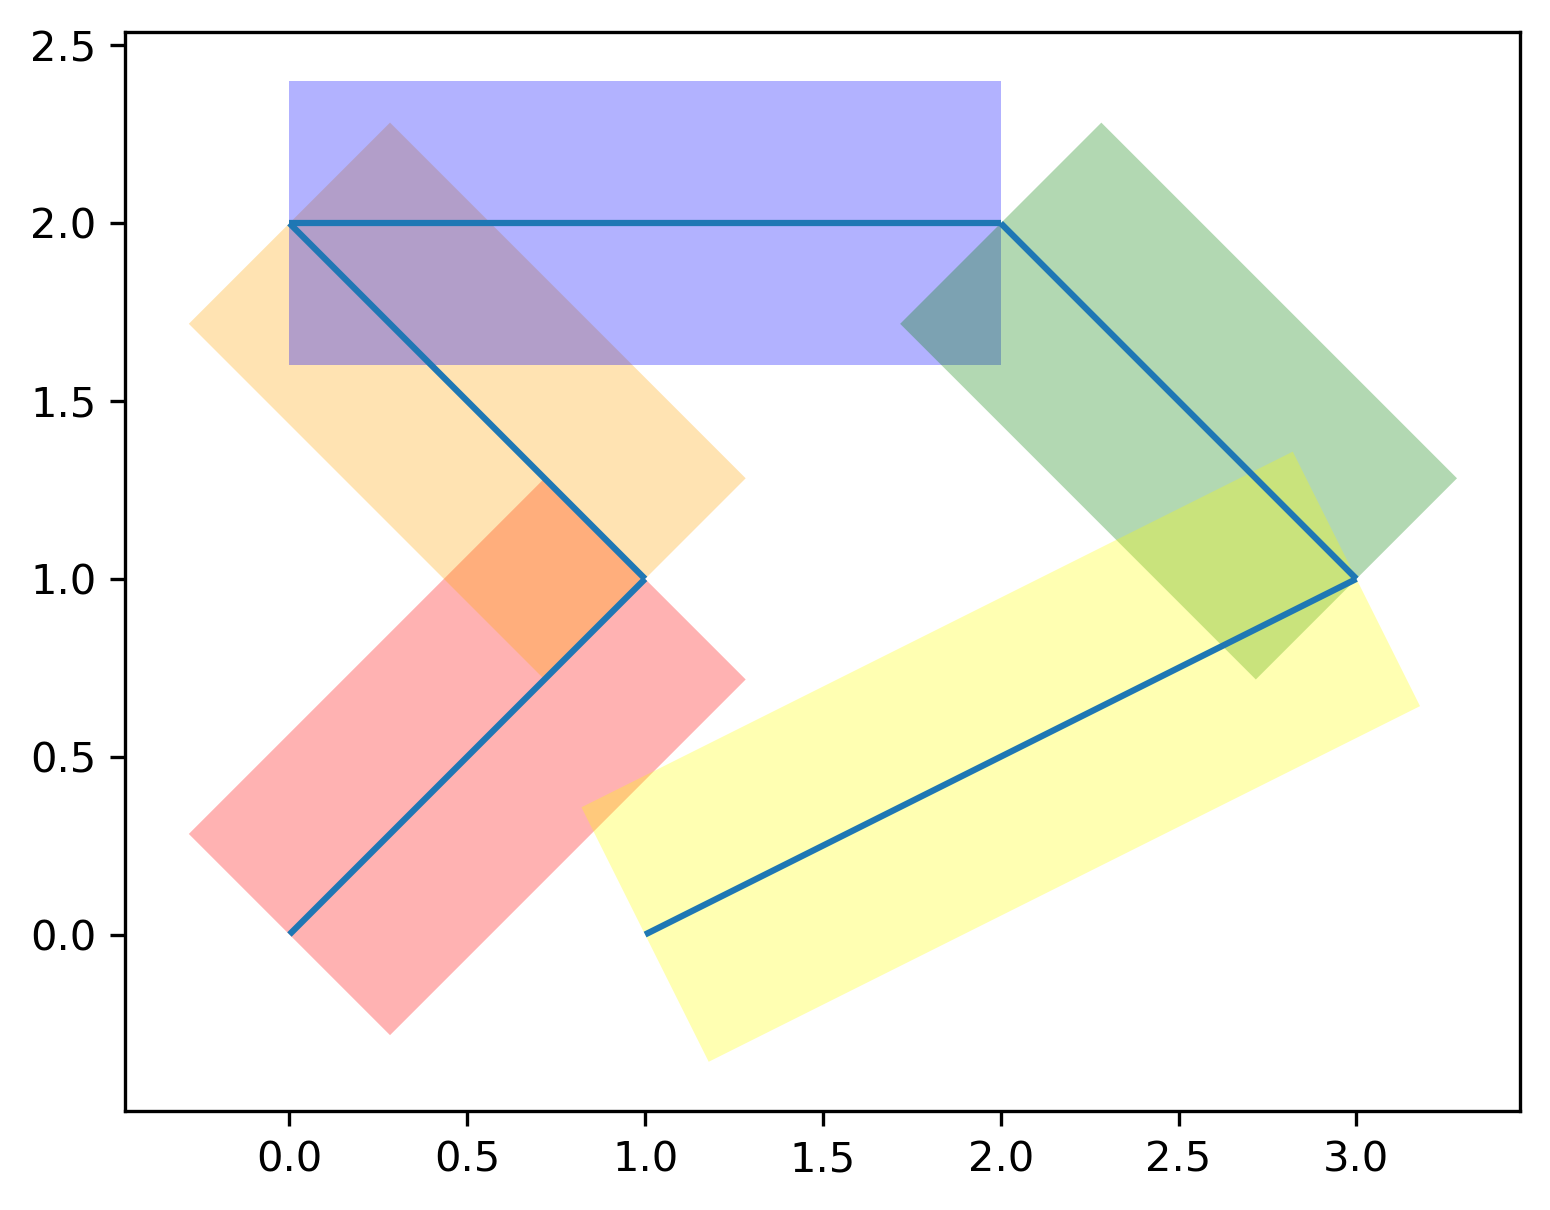

In [43]:
import geopandas as gpd
# testline = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
testlines = gpd.GeoSeries([LineString([(0, 0), (1, 1)]),
                            LineString([(1, 1), (0, 2)]),
                            LineString([(0, 2), (2, 2)]),
                            LineString([(2, 2), (3, 1)]),
                            LineString([(3, 1), (1, 0)])])
testbuffer = testlines.buffer(0.4, cap_style=2, join_style=2)
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
gpd.GeoSeries(testlines).plot(ax = ax)
color = ['red','orange','blue','green','yellow']
for i in range(len(testbuffer)):
    gpd.GeoSeries(testbuffer[i]).plot(ax = ax, color = color[i], alpha=0.3)

(3682200.0, 3684000.0)

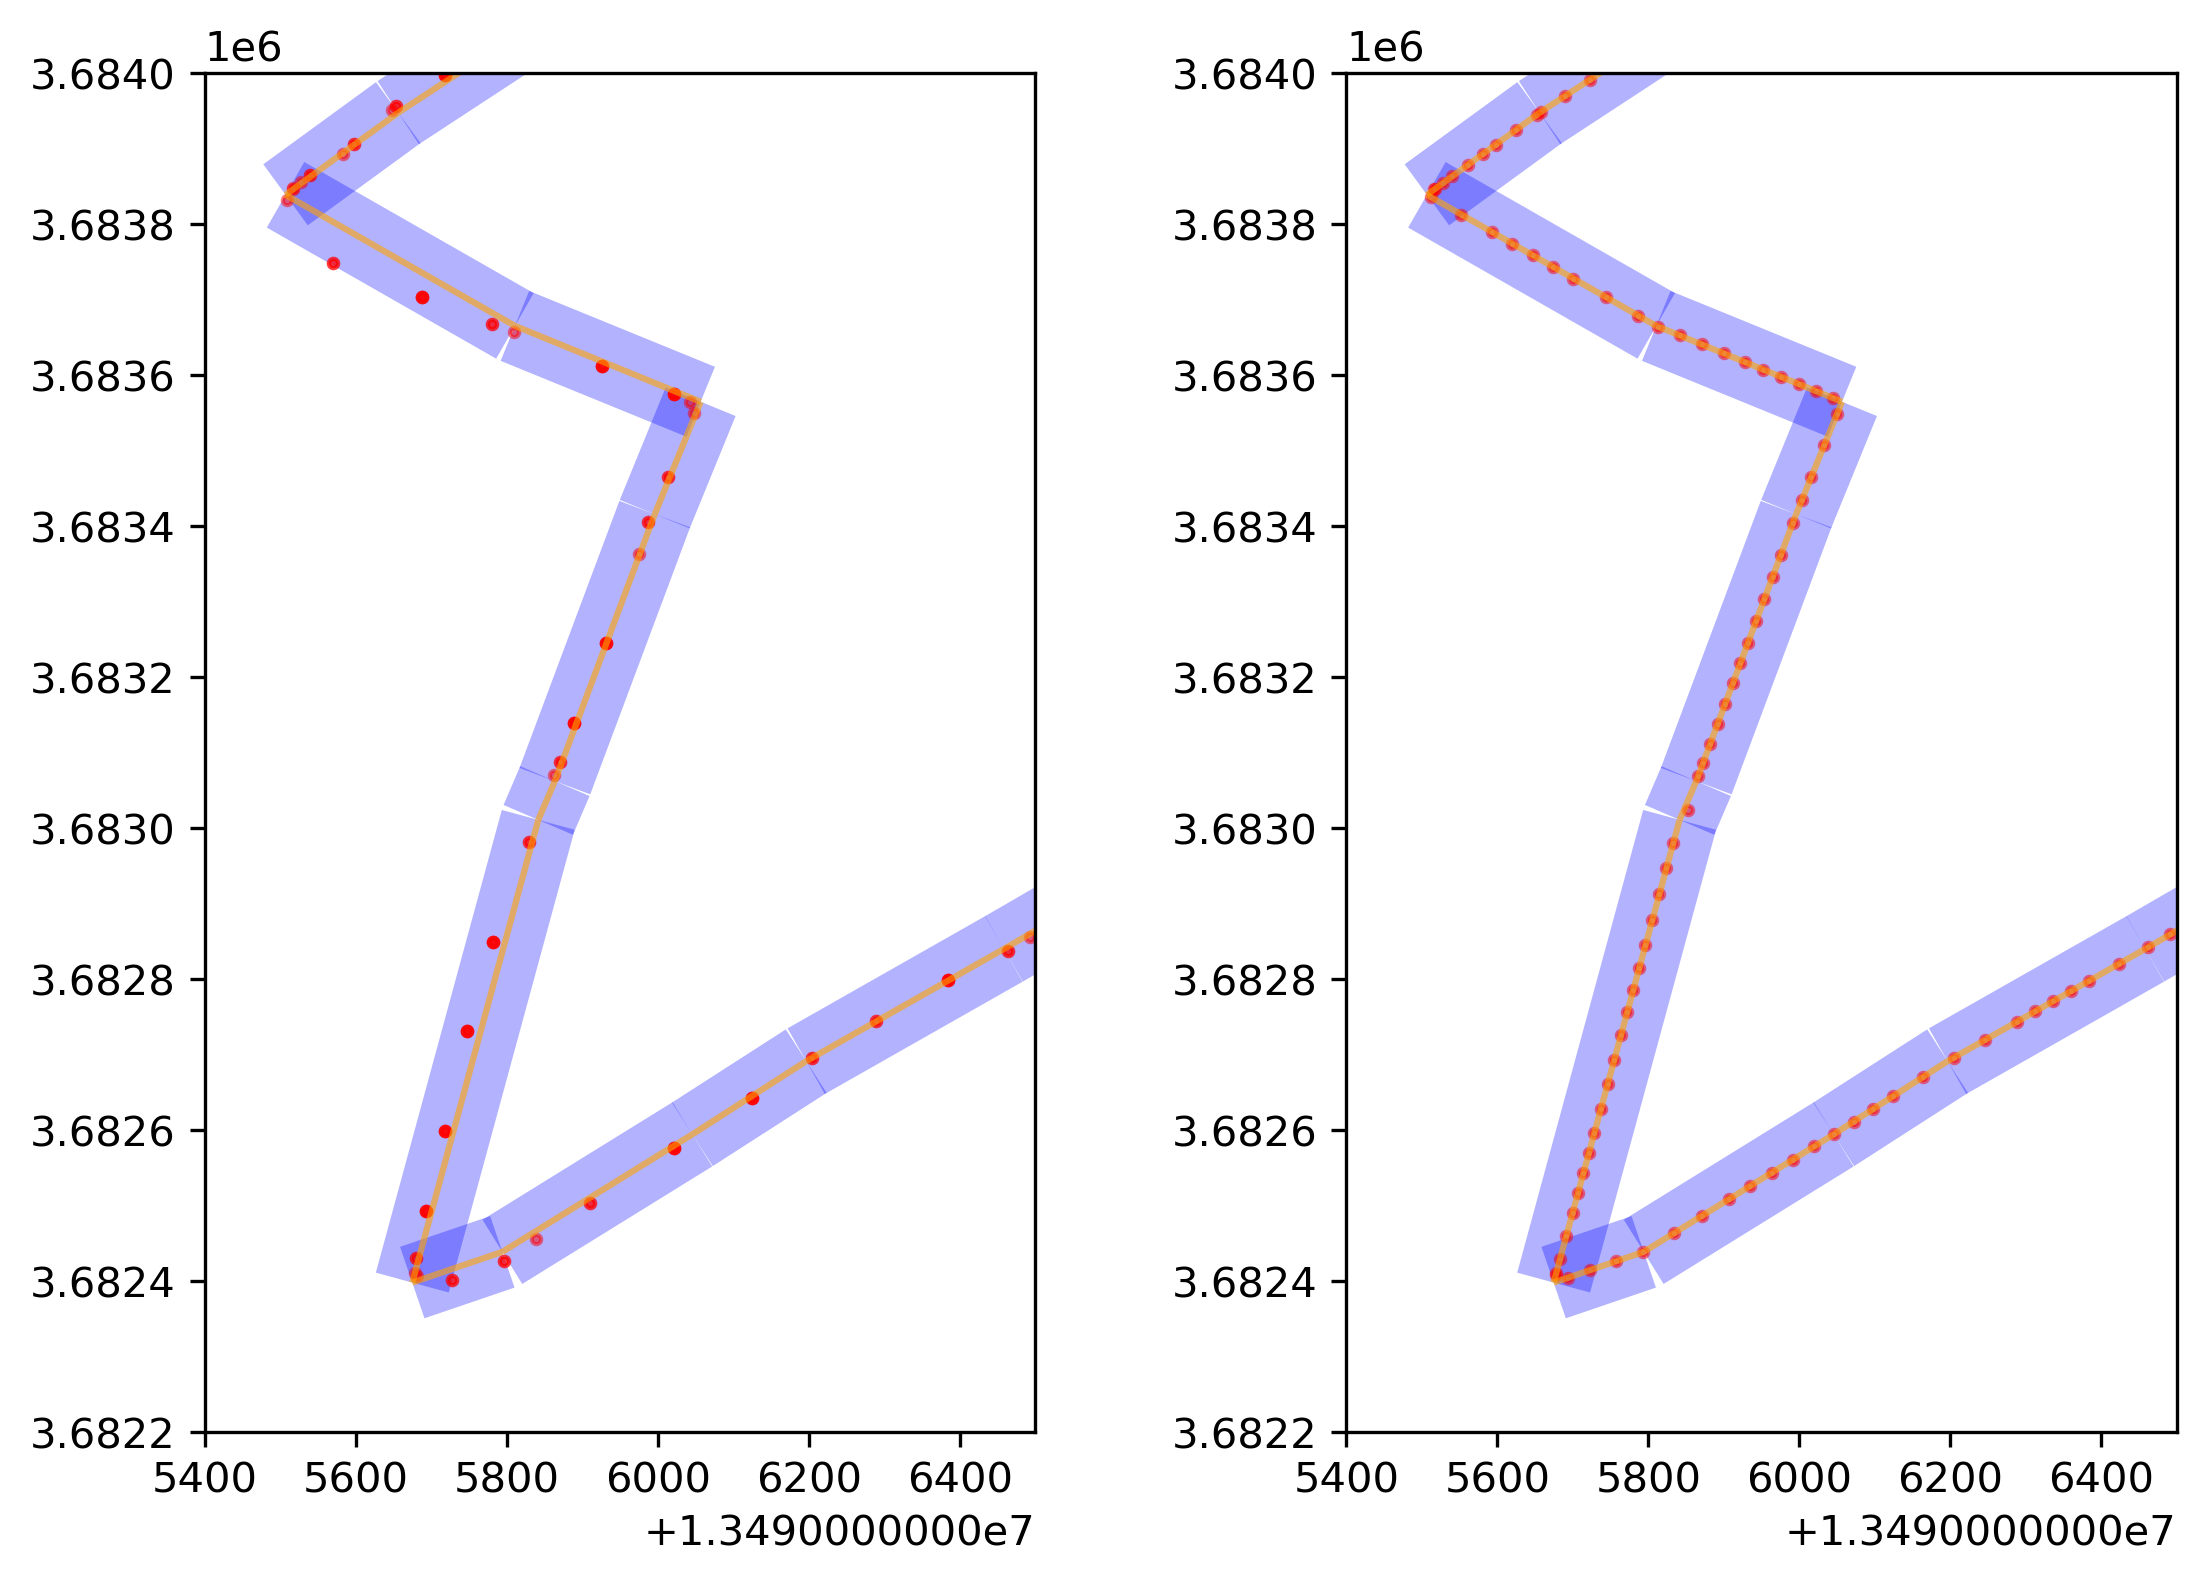

In [48]:
import geopandas as gpd
plt_mapline = gpd.GeoDataFrame(mapline)
plt_routine = gpd.GeoDataFrame(routine)
fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
plt_mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
plt_routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

ax[0].set_xlim((5400+1.349e7, 6500+1.349e7))
ax[0].set_ylim((3.6822e6, 3.684e6))
# ax[0].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[0].set_ylim((3.685e6, 3.686e6))

plt_mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
plt_mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
adjusted_routine = gpd.GeoDataFrame({'geometry':plt_routine['adjusted_geometry']})
adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)


ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
ax[1].set_ylim((3.6822e6, 3.684e6))
# ax[1].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[1].set_ylim((3.685e6, 3.686e6))

# mapline['rect_buffer'].plot(ax = ax[2], color = 'blue', alpha=0.3)
# mapline.plot(ax = ax[2], color = 'orange',alpha=0.6)
# adjusted_routine = gpd.GeoDataFrame({'geometry':test_routine['adjusted_geometry']})
# adjusted_routine.plot(ax = ax[2], color = 'red', alpha = 0.5, markersize = 5)
# # routine['adjusted_geometry'].plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# # ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
# # ax[1].set_ylim((3.6822e6, 3.684e6))
# ax[2].set_xlim((7000+1.349e7, 8000+1.349e7))
# ax[2].set_ylim((3.685e6, 3.686e6))

# ax[0].set_xlim((7800+1.349e7, 9000+1.349e7))
# ax[0].set_ylim((3.679e6, 3.682e6))
# ax[1].set_xlim((7800+1.349e7, 9000+1.349e7))
# ax[1].set_ylim((3.679e6, 3.682e6))


In [45]:
370
371
372
373
374

374

In [46]:
from shapely import geometry as geo
def check(idx_list):
    res = []
    for idx in idx_list:
        buffer = routine.loc[idx, 'belong_rect_buffer'][0]
        line = routine.loc[idx, 'selected_line']
        point = routine.loc[idx, 'adjusted_geometry']
        res += [buffer,line,point]
    return res
    

In [47]:
169 173

SyntaxError: invalid syntax (Temp/ipykernel_11236/1848837256.py, line 1)

In [ ]:
geo.GeometryCollection(check([169, 170, 171, 173]))

In [ ]:
buffer = routine.loc[2, 'belong_rect_buffer'][0]
line = routine.loc[2, 'selected_line']
point = routine.loc[2, 'adjusted_geometry']
from shapely import geometry as geo
geo.GeometryCollection([buffer,line,point])

In [ ]:
mapdf

In [ ]:
mapline

In [ ]:
mapline

,name,geometry,start,end,start_is_station,end_is_station,circ_buffer,rect_buffer,end_length,base_length
0,公交嘉定新城站-交叉口0,"LINESTRING (13497418.239 3676110.042, 13497423...",公交嘉定新城站,交叉口0,True,False,"POLYGON ((13497472.207 3676094.588, 13497472.9...","POLYGON ((13497472.207 3676094.588, 13497374.0...",25.523172,0.000000
1,交叉口0-交叉口1,"LINESTRING (13497423.137 3676084.993, 13497578...",交叉口0,交叉口1,False,False,"POLYGON ((13497552.647 3676219.269, 13497556.9...","POLYGON ((13497552.647 3676219.269, 13497603.3...",179.730418,25.523172
2,交叉口1-交叉口2,"LINESTRING (13497578.016 3676176.183, 13497768...",交叉口1,交叉口2,False,False,"POLYGON ((13497813.081 3675822.569, 13497815.0...","POLYGON ((13497813.081 3675822.569, 13497723.8...",421.661292,205.253589
3,交叉口2-交叉口3,"LINESTRING (13497768.472 3675799.985, 13497605...",交叉口2,交叉口3,False,False,"POLYGON ((13497625.118 3675683.073, 13497620.5...","POLYGON ((13497625.118 3675683.073, 13497585.2...",178.098314,626.914881
4,交叉口3-交叉口4,"LINESTRING (13497605.166 3675728.920, 13497575...",交叉口3,交叉口4,False,False,"POLYGON ((13497590.984 3675671.693, 13497586.2...","POLYGON ((13497590.984 3675671.693, 13497559.9...",31.242678,805.013196
...,...,...,...,...,...,...,...,...,...,...
83,菊园新村-交叉口57,"LINESTRING (13497461.876 3684422.494, 13497496...",菊园新村,交叉口57,True,False,"POLYGON ((13497447.721 3684622.058, 13497448.8...","POLYGON ((13497447.721 3684622.058, 13497546.0...",193.716993,16737.207632
84,交叉口57-嘉行公路平城路,"LINESTRING (13497496.897 3684613.019, 13497519...",交叉口57,嘉行公路平城路,False,True,"POLYGON ((13497469.795 3684915.618, 13497470.4...","POLYGON ((13497469.795 3684915.618, 13497569.5...",299.667656,16930.924625
85,嘉行公路平城路-交叉口58,"LINESTRING (13497519.651 3684911.822, 13497512...",嘉行公路平城路,交叉口58,True,False,"POLYGON ((13497462.520 3684973.303, 13497462.2...","POLYGON ((13497462.520 3684973.303, 13497561.9...",67.408563,17230.592282
86,交叉口58-交叉口59,"LINESTRING (13497512.215 3684978.819, 13497513...",交叉口58,交叉口59,False,False,"POLYGON ((13497463.707 3685418.672, 13497463.9...","POLYGON ((13497463.707 3685418.672, 13497563.7...",439.686136,17298.000845


In [ ]:
print(routine[['time','base_length', 'cum_length', 'end_length','start','end']])

                   time   base_length    cum_length  end_length  start    end
0   2021-09-06 12:54:19     25.523172     40.804717  179.730418   交叉口0   交叉口1
1   2021-09-06 12:54:22     25.523172     40.804717  179.730418   交叉口0   交叉口1
2   2021-09-06 12:54:42     25.523172     46.983946  179.730418   交叉口0   交叉口1
3   2021-09-06 12:54:52     25.523172     69.581619  179.730418   交叉口0   交叉口1
4   2021-09-06 12:55:02     25.523172     85.327552  179.730418   交叉口0   交叉口1
..                  ...           ...           ...         ...    ...    ...
715 2021-09-06 14:16:11  17298.000845  17702.117221  439.686136  交叉口58  交叉口59
716 2021-09-06 14:16:21  17298.000845  17702.117221  439.686136  交叉口58  交叉口59
717 2021-09-06 14:16:31  17298.000845  17714.120074  439.686136  交叉口58  交叉口59
718 2021-09-06 14:16:36  17298.000845  17756.445171  439.686136  交叉口58  交叉口59
719 2021-09-06 14:16:41   17737.68698  17798.770268  375.649536  交叉口59   菊园车站

[720 rows x 6 columns]
